# Special topics: NetCDF

NetCDF is a binary storage format for many different kinds of rectangular data. Examples include atmosphere and ocean model output, satellite images, and timeseries data. NetCDF files are intended to be device independent, and the dataset may be querried in a fast, random-access way. More information about NetCDF files can be found [here](http://www.unidata.ucar.edu/software/netcdf/). The [CF conventions](http://cfconventions.org) are used for storing NetCDF data for earth system models, so that programs can be aware of the coordinate axes used by the data cubes.

### Sea surface temperature example

An example NetCDF file containing sea surface temperature over the last XXX years can be found [here](http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.ersst.v4.html). To read this, you will need the NetCDF4 package, which can be installed using `conda install netCDF4`.

In [34]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import netCDF4

In [9]:
nc = netCDF4.Dataset('sst.mnmean.v4.nc')
print(nc)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format UNDEFINED):
    history: created 10/2014 by CAS using NCDC's ERSST V4 ascii values
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.
    citation: Huang et al, 2014: Extended Reconstructed Sea Surface Temperatures Version 4 (ERSST.v4), Part I. Upgrades and Intercomparisons. Journal of Climate.
    comment: SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker
    Conventions: CF-1.2
    institution: This version written at NOA

The representation of the object shows some of the attributes of the netCDF file. The final few lines show the dimensions and the variable names (with corresponding dimensions). Another representation of the file can be seen using the `ncdump` command. This is similar to the output of the command (at a command-line prompt, not within python) 

    $ ncdump -h sst.mnmean.v4.nc
     
    netcdf sst.mnmean.v4 {
    dimensions:
        lon = 180 ;
        lat = 89 ;
        nbnds = 2 ;
        time = UNLIMITED ; // (1946 currently)
    variables:
        float lat(lat) ;
            lat:units = "degrees_north" ;
            lat:long_name = "Latitude" ;
            lat:actual_range = 88.f, -88.f ;
            lat:standard_name = "latitude" ;
            lat:axis = "Y" ;
            lat:coordinate_defines = "center" ;
        float lon(lon) ;
            lon:units = "degrees_east" ;
            lon:long_name = "Longitude" ;
            lon:actual_range = 0.f, 358.f ;
            lon:standard_name = "longitude" ;
            lon:axis = "X" ;
            lon:coordinate_defines = "center" ;
        double time_bnds(time, nbnds) ;
            time_bnds:long_name = "Time Boundaries" ;
        double time(time) ;
            time:units = "days since 1800-1-1 00:00:00" ;
            time:long_name = "Time" ;
            time:delta_t = "0000-01-00 00:00:00" ;
            time:avg_period = "0000-01-00 00:00:00" ;
            time:prev_avg_period = "0000-00-07 00:00:00" ;
            time:standard_name = "time" ;
            time:axis = "T" ;
            time:actual_range = 19723., 78923. ;
        float sst(time, lat, lon) ;
            sst:long_name = "Monthly Means of Sea Surface Temperature" ;
            sst:units = "degC" ;
            sst:var_desc = "Sea Surface Temperature" ;
            sst:level_desc = "Surface" ;
            sst:statistic = "Mean" ;
            sst:missing_value = -9.96921e+36f ;
            sst:actual_range = -1.8f, 33.95f ;
            sst:valid_range = -5.f, 40.f ;
            sst:dataset = "NOAA Extended Reconstructed SST V4" ;
            sst:parent_stat = "Individual Values" ;

    // global attributes:
            :history = "created 10/2014 by CAS using NCDC\'s ERSST V4 ascii values" ;
    [....and so on....]

### Mapping the netcdf object to the python object

We can querry the data within the NetCDF file using the NetCDF object. The structure of the object (the composition of the methods and attributes) is designed to mirror the data structure in the file. See how these querries give the same information as the textual representation above.

In [12]:
# `Global` attributes of the file
nc.history

u"created 10/2014 by CAS using NCDC's ERSST V4 ascii values"

In [20]:
# Variables are stored in a dictionary
nc.variables['lon']  # this is a variable object, just a pointer to the variable. NO DATA HAS BEEN LOADED!

<type 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [   0.  358.]
    standard_name: longitude
    axis: X
    coordinate_defines: center
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.96920996839e+36 used

In [19]:
# Variable objects also have attributes
nc.variables['lon'].units

u'degrees_east'

In [17]:
# we can also query the dimensions
nc.dimensions['lon']

<type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180

In [16]:
# to find the length of a dimension, do
len(nc.dimensions['lon'])

<type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180

In [21]:
# A list of the dimensions can be found by looking at the keys in the dimensions dictionary
nc.dimensions.keys()

[u'lon', u'lat', u'nbnds', u'time']

In [23]:
# Same for variables
nc.variables.keys()

[u'lat', u'lon', u'time_bnds', u'time', u'sst']

In [25]:
# Let's take a look at the main 3D variable
nc['sst'] # A shorthand for nc.variables['sst']

<type 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    missing_value: -9.96921e+36
    actual_range: [ -1.79999995  33.95000076]
    valid_range: [ -5.  40.]
    dataset: NOAA Extended Reconstructed SST V4
    parent_stat: Individual Values
unlimited dimensions: time
current shape = (1946, 89, 180)
filling on, default _FillValue of 9.96920996839e+36 used

---
### *Exercise*

> Inspect the NetCDF object. 

>  1. What are the units of the time variable?
>  1. What are the dimensions of the latitude variable?
>  1. What is the length of the latitude dimension?

---

In [43]:
# We can extract data from the file by indexing:
lon = nc['lon'][:]
lat = nc['lat'][:]
sst = nc['sst'][0]   # same as nc['sst'][0, :, :], gets the first 2D time slice in the series.

In [65]:
# Extract the time variable using the convinient num2date
time = netCDF4.num2date(nc['time'][:], nc['time'].units)

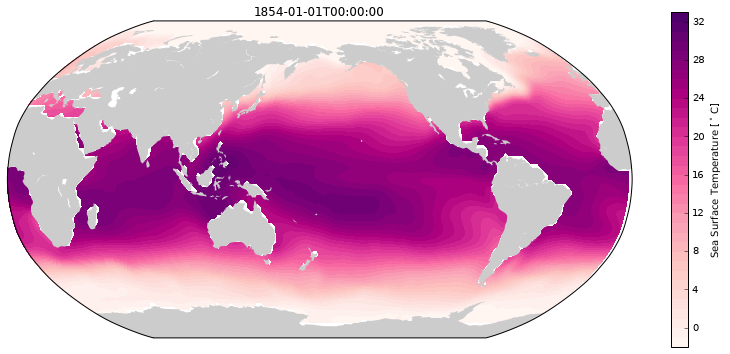

In [82]:
fig = plt.figure(figsize=(14,6))
m = Basemap(projection='robin', lon_0=180)
m.fillcontinents('0.8')
x, y = m(*np.meshgrid(lon, lat))
plt.contourf(x, y, sst, np.arange(-2, 34), cmap='RdPu')
plt.title(time[0].isoformat())
plt.colorbar().set_label(r'Sea Surface Temperature [$^\circ$C]')

The netCDF library can be compiled such that it is 'THREDDS enabled', which means that you can put in a URL instead of a filename. This allows access to large remote datasets, without having to download the entire file. You can find a large list of datasets served via an OpenDAP/THREDDs server [here](http://apdrc.soest.hawaii.edu/data/data.php)

### THREDDS example. Loading data from a remote dataset.

Let's look at the ESRL/NOAA 20th Century Reanalysis – Version 2. You can access the data by the following link (this is the link of the `.dds` and `.das` files without the extension.):

In [91]:
nc_cprat = netCDF4.Dataset('http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel/cprat')

In [92]:
nc_cprat['cprat'].long_name

u'daily convective precipitation rate (kg/m^2/s) '

In [100]:
time = netCDF4.num2date(nc_cprat['time'][:], nc_cprat['time'].units)

In [101]:
cprat = nc_cprat['cprat'][-1]   # get the last time, datetime.datetime(2012, 12, 31, 0, 0)
lon = nc_cprat['lon'][:]
lat = nc_cprat['lat'][:]

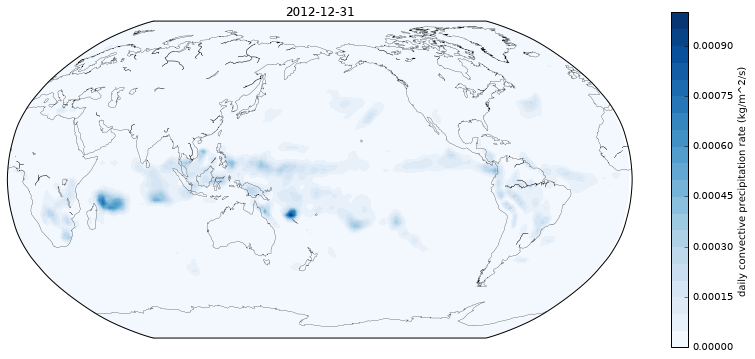

In [113]:
fig = plt.figure(figsize=(14,6))
m = Basemap(projection='robin', lon_0=180)
m.drawcoastlines(linewidth=0.25)
x, y = m(*np.meshgrid(lon, lat))
plt.contourf(x, y, cprat, 20, cmap='Blues')
plt.title(time[-1].isoformat()[:10])
plt.colorbar().set_label(r'%s' % nc_cprat['cprat'].long_name)

---
### *Exercise*

> Pick another variable from [this dataset](http://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/esrl/daily/monolevel). Inspect and plot the variable in a similar manner to percipitation

> Find another dataset on a THREDDS server at SOEST (or elsewhere), pick a variable, and plot it.

---

### Creating NetCDF files

We can also create a NetCDF file to store data.

In [117]:
from matplotlib import tri

Ndatapoints = 1000
Ntimes = 20
Nbad = 200

xdata = np.random.rand(Ndatapoints)
ydata = np.random.rand(Ndatapoints)
time = np.arange(Ntimes)

# create a progressive wave
fdata = np.sin((xdata+ydata)[np.newaxis, :]*5.0 + 
               time[:, np.newaxis]/3.0)

# remove some random 'bad' data.
idx = range(fdata.size)
np.random.shuffle(idx)
fdata.flat[idx[:Nbad]] = np.nan

ygrid, xgrid = np.mgrid[0:1:60j, 0:1:50j]
fgrid = np.ma.empty((Ntimes, 60, 50), 'd')

# interpolate
for n in range(Ntimes):
    igood = ~np.isnan(fdata[n])
    t = tri.Triangulation(xdata[igood], ydata[igood])
    interp = tri.LinearTriInterpolator(t, fdata[n][igood])
    fgrid[n] = interp(xgrid, ygrid)

# create netCDF file

nc = netCDF4.Dataset('foo.nc', 'w')
nc.author = 'Rob Hetland'

nc.createDimension('x', 50)
nc.createDimension('y', 60)
nc.createDimension('time', None)    # An 'unlimited' dimension. 

nc.createVariable('f', 'd', ('time', 'y', 'x'))
nc.variables['f'][:] = fgrid
nc.variables['f'].units = 'meters sec-1'

nc.createVariable('x', 'd', ('x',))
nc.variables['x'][:] = xgrid[0, :]
nc.variables['x'].units = 'meters'

nc.createVariable('y', 'd', ('y',))
nc.variables['y'][:] = ygrid[:, 0]
nc.variables['y'].units = 'meters'

nc.createVariable('time', 'd', ('time',))
nc.variables['time'][:] = time
nc.variables['time'].units = 'seconds'

nc.close()


### GRIB files

NetCDF4 can also read GRIB2 files over THREDDS! GRIB files are used by NOAA for weather forecast and climate model output. There are many, many, many datasets that are available over THREDDS in GRIB format.

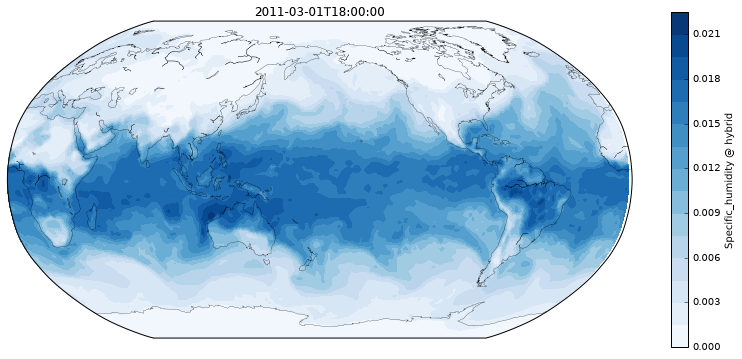

In [132]:
nc = netCDF4.Dataset('http://nomads.ncdc.noaa.gov/thredds/dodsC/modeldata/cmd_grblow/2011/201103/20110301/spllnl.gdas.2011030118.grb2')
sh = nc['Specific_humidity'][0, 0]
lon = nc['lon'][:]
lat = nc['lat'][:]
time = netCDF4.num2date(nc['time'][0], nc['time'].units)

fig = plt.figure(figsize=(14,6))
m = Basemap(projection='robin', lon_0=180)
m.drawcoastlines(linewidth=0.25)
x, y = m(*np.meshgrid(lon, lat))
plt.contourf(x, y, sh, 20, cmap='Blues')
plt.title(time.isoformat())
plt.colorbar().set_label(r'%s' % nc['Specific_humidity'].long_name)

---
### *Exercise*

> Find another dataset at [NOMADS](http://nomads.ncdc.noaa.gov/thredds) (or [here](http://nomads.ncdc.noaa.gov/data.php)), and plot it up!

> *Bonus*: Try to read in and plot regional model predictions: [NAM](http://nomads.ncdc.noaa.gov/thredds/catalog/nam218/catalog.html)


---

### See also

- [Xarray](http://xarray.pydata.org/en/stable/): NetCDF + PANDAS + CF conventions. Awesome.
- [pygrib](https://github.com/jswhit/pygrib): Reading GRIB files.
- [ncview](http://meteora.ucsd.edu/~pierce/ncview_home_page.html): Not python, but a very useful NetCDF file viewer.